#**Actividad de la semana 2**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof Luis Eduardo Falcón Morales**

###**Nombre del estudiante: Enrique Ricardo García Hernández**

###**Matrícula: A01315428**

**NOTAS:**

*   El siguiente documento supone que ejecutarás el archivo con Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en la aplicación de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente deberás modificar este archivo agregando tus líneas de código en las 3 partes que se te indican.** 
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression

In [4]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

INSTRUCCIONES:

En este ejercicio debes solamente desplegar la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par variables. 

Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'. 

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_

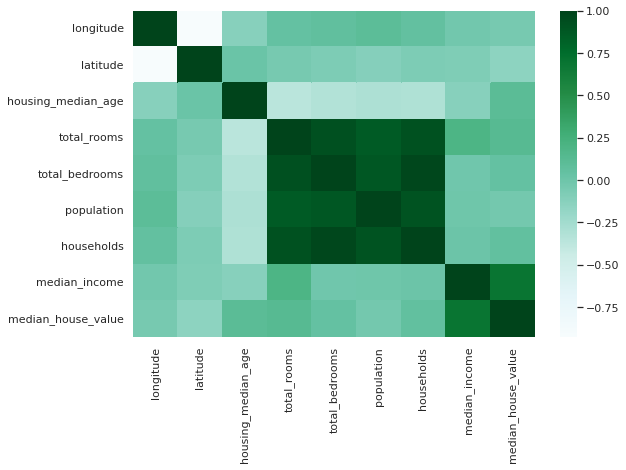

In [23]:
sns.set(rc={'figure.figsize':(9,6)}) 

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 1
# Sustituye "None" por tus líneas de código dentro de esta región.
# Se esperan cuando mucho 2 líneas de código.
print(misdatos.corr(method='pearson'))
headmap = sns.heatmap(misdatos.corr(method='pearson'),cmap="BuGn")

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

#**Ejercicio - 2: Transformaciones e Histogramas de variables**

INSTRUCCIONES:

En este ejercicio se trabajará solamente con las siguientes 7 variables: 

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas columnas les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Box-Cox con scikit-learn.


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

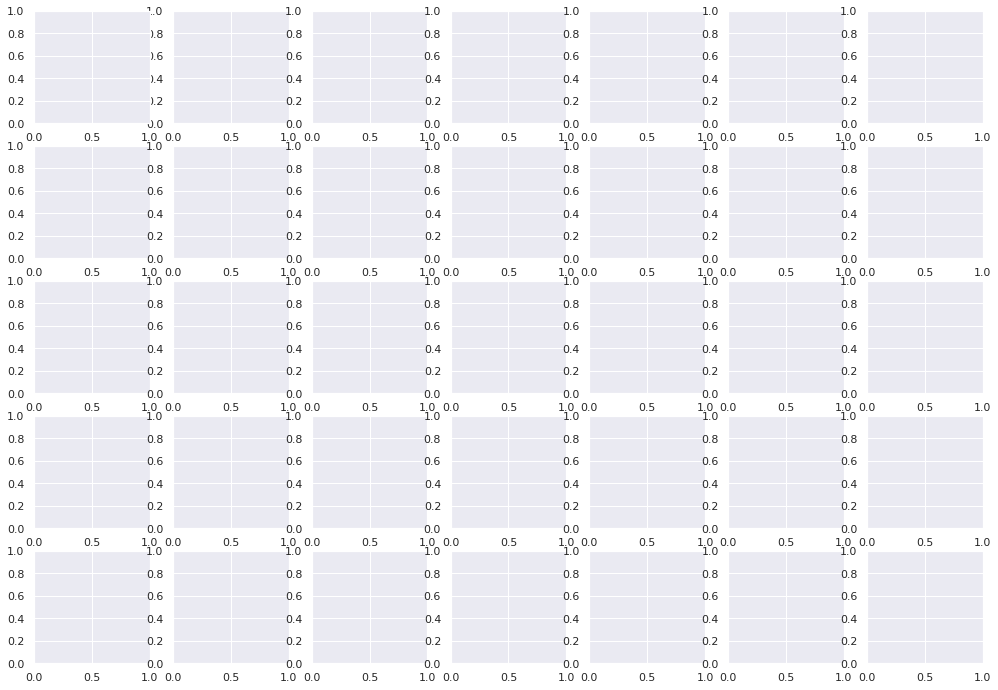

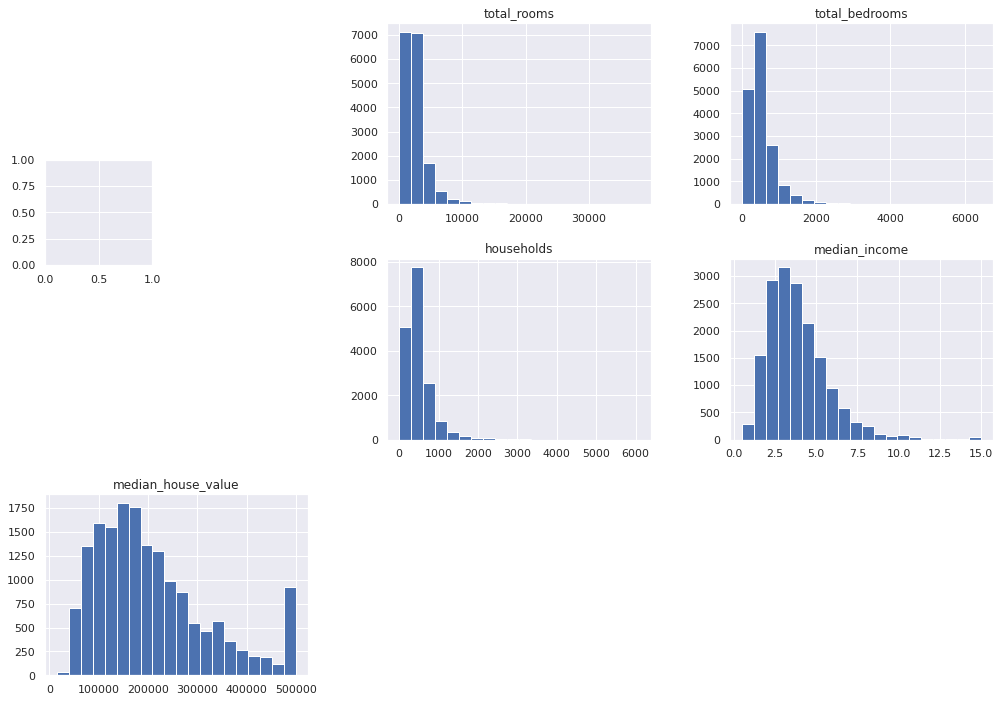

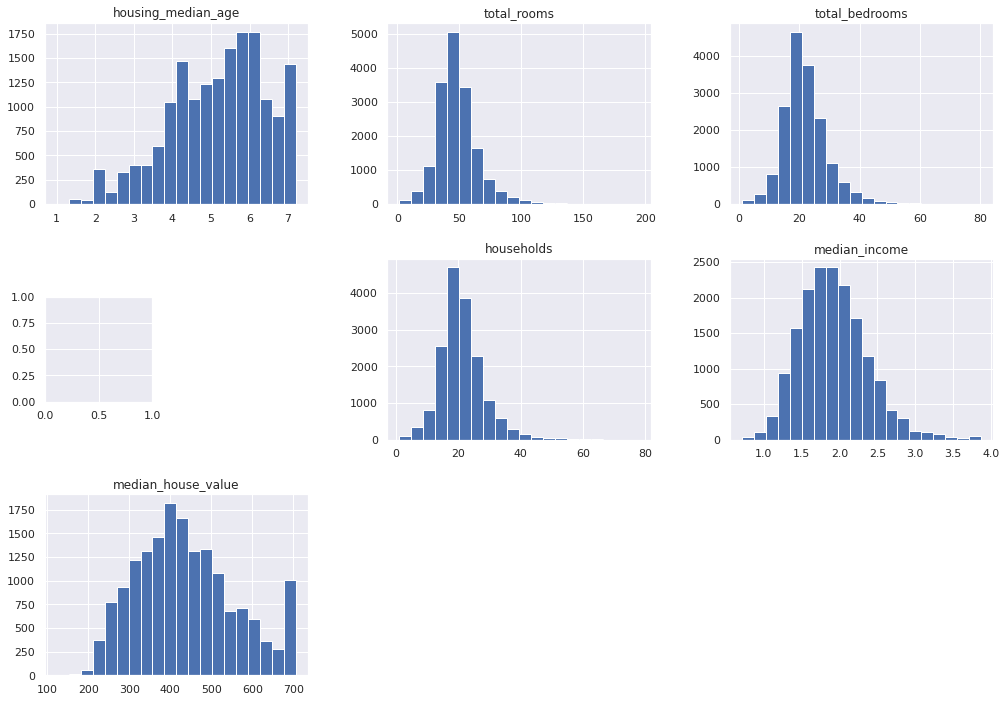

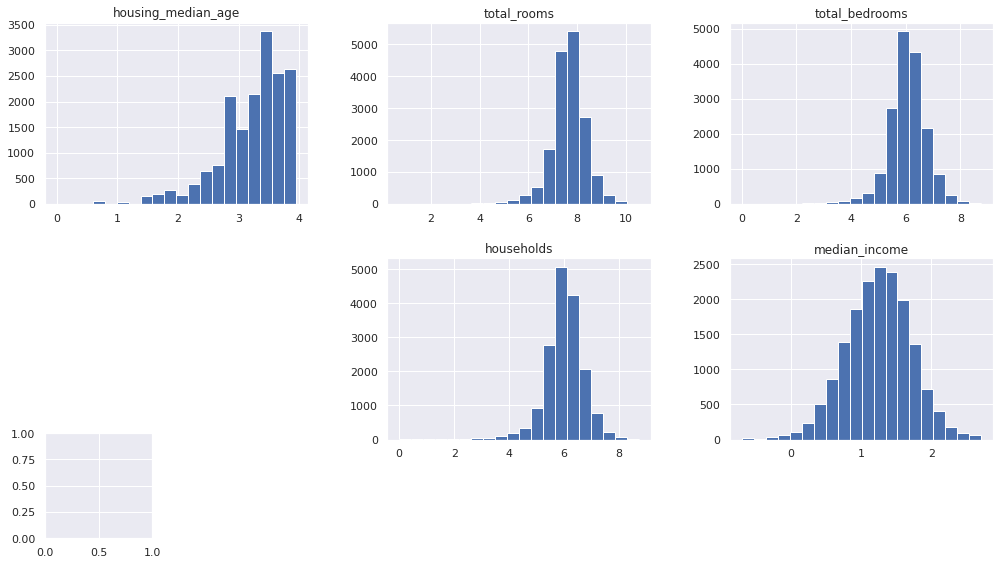

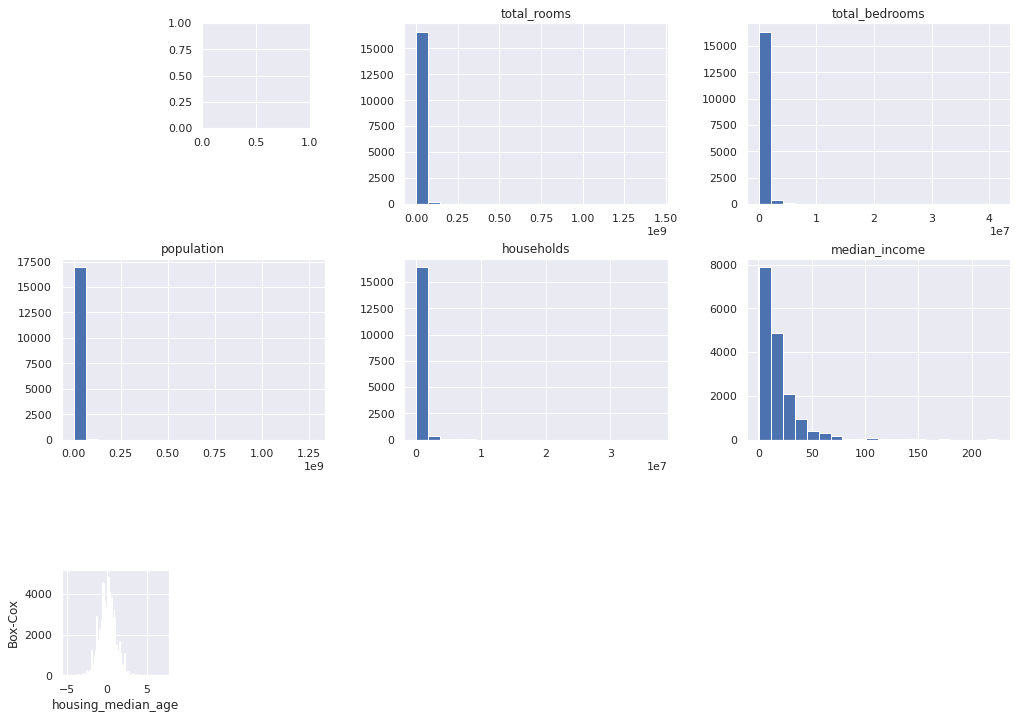

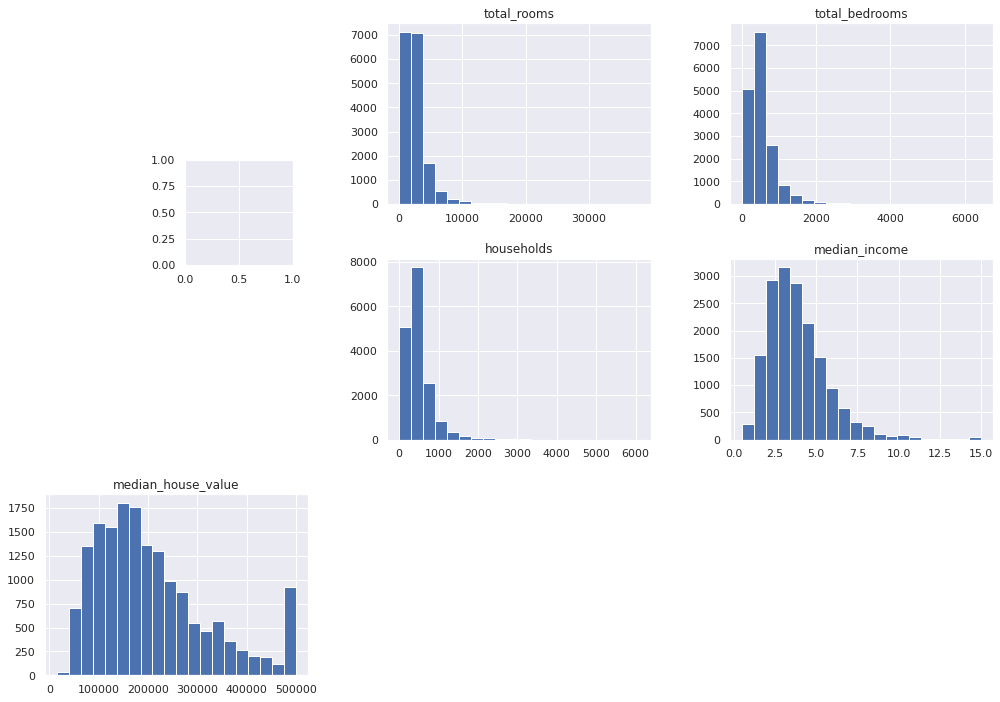

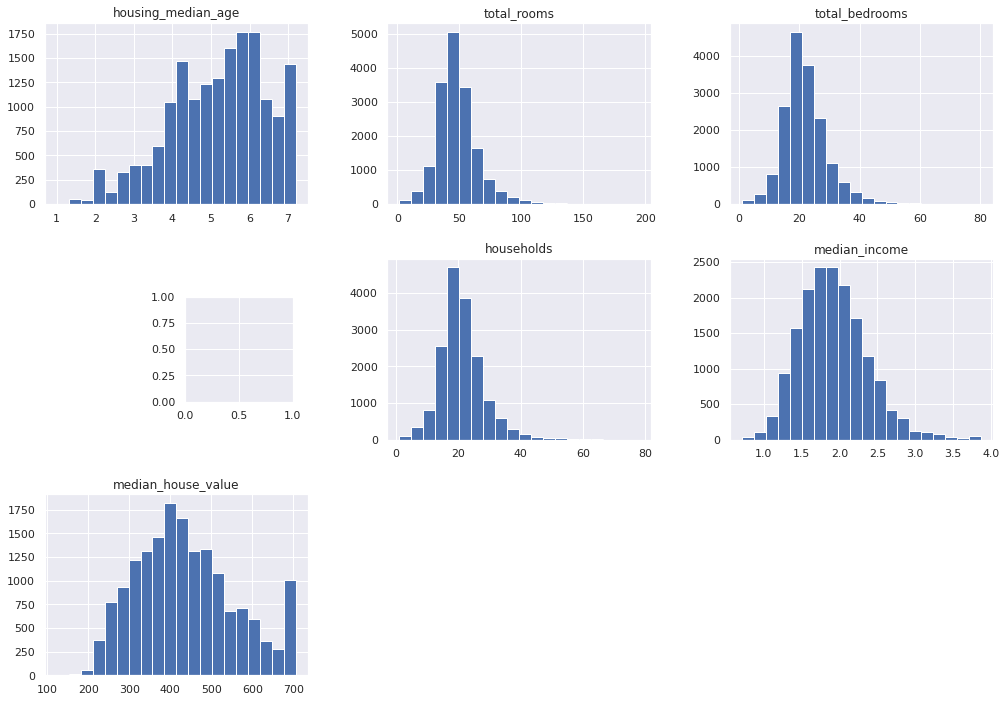

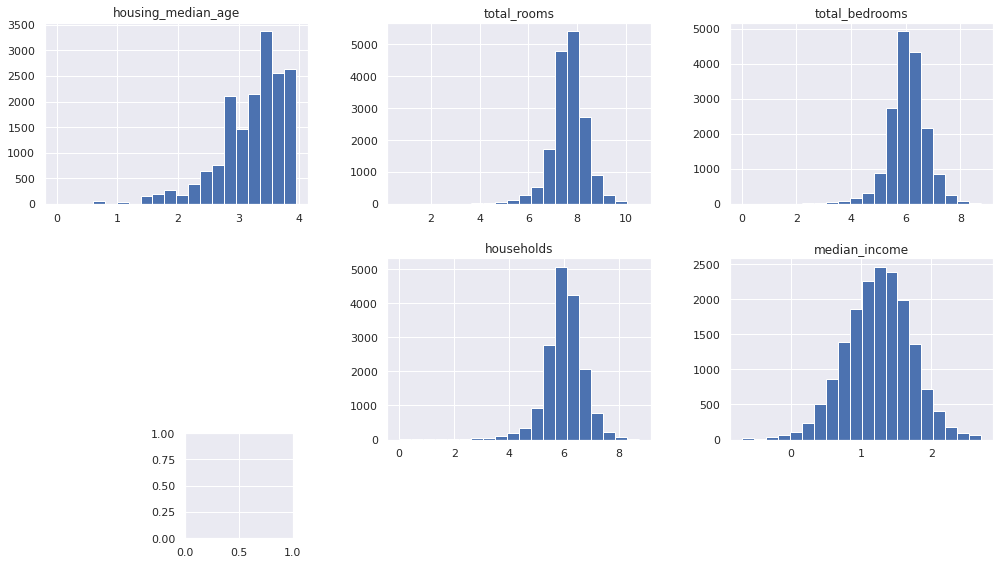

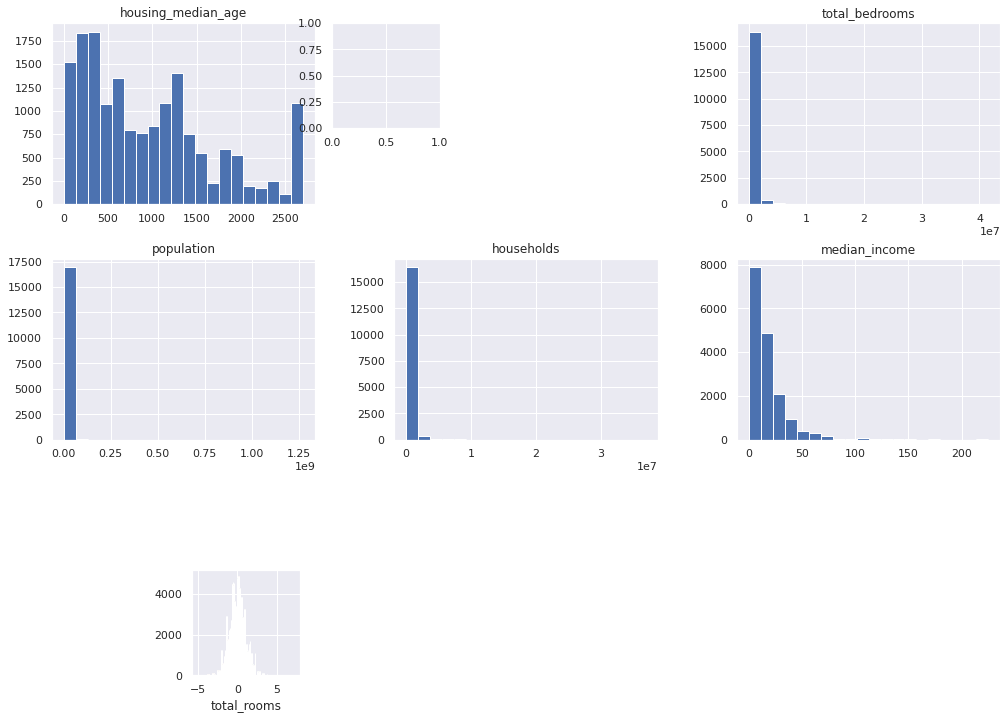

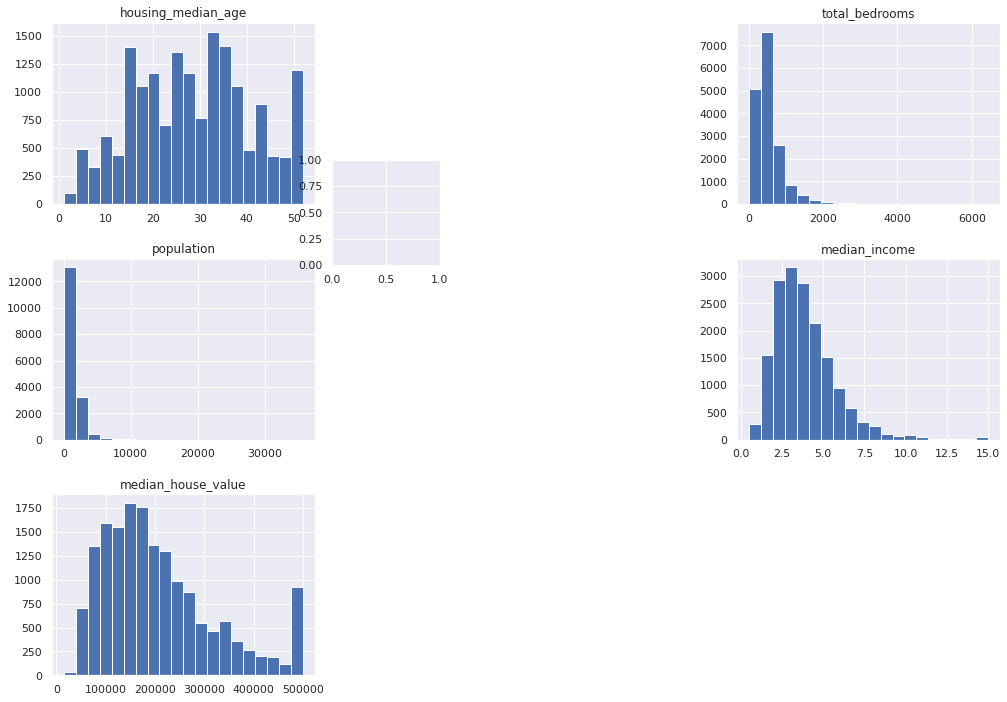

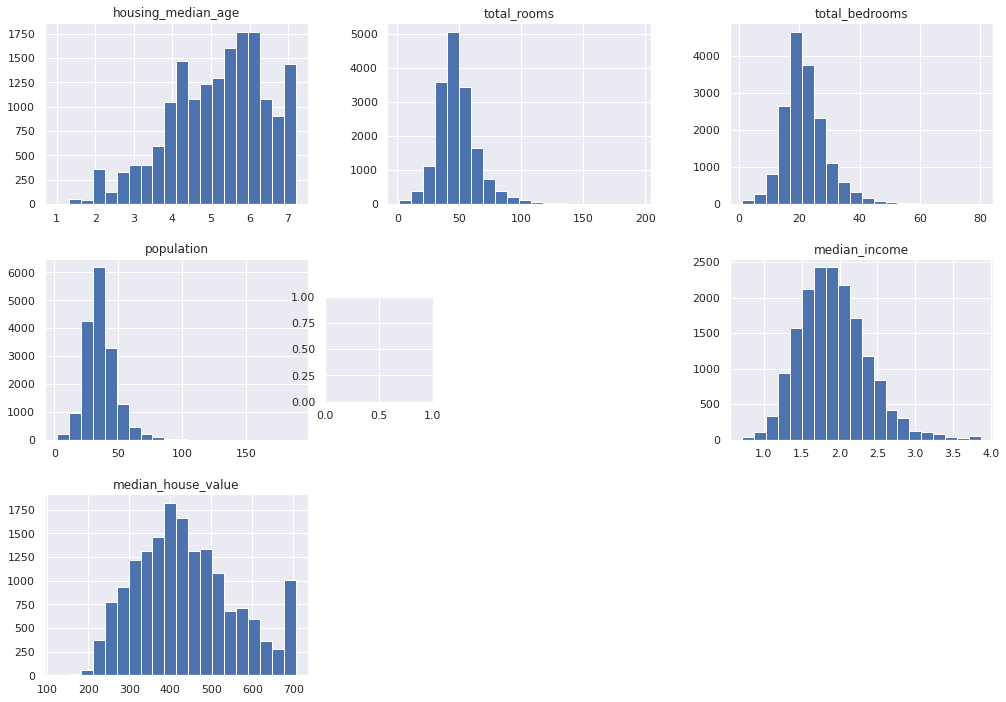

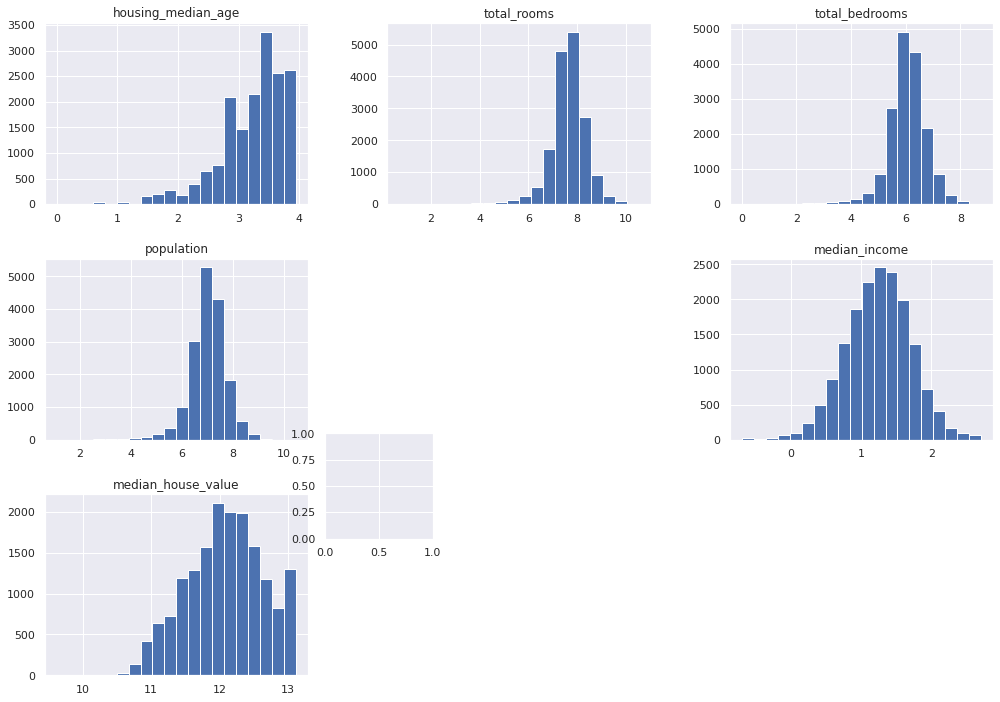

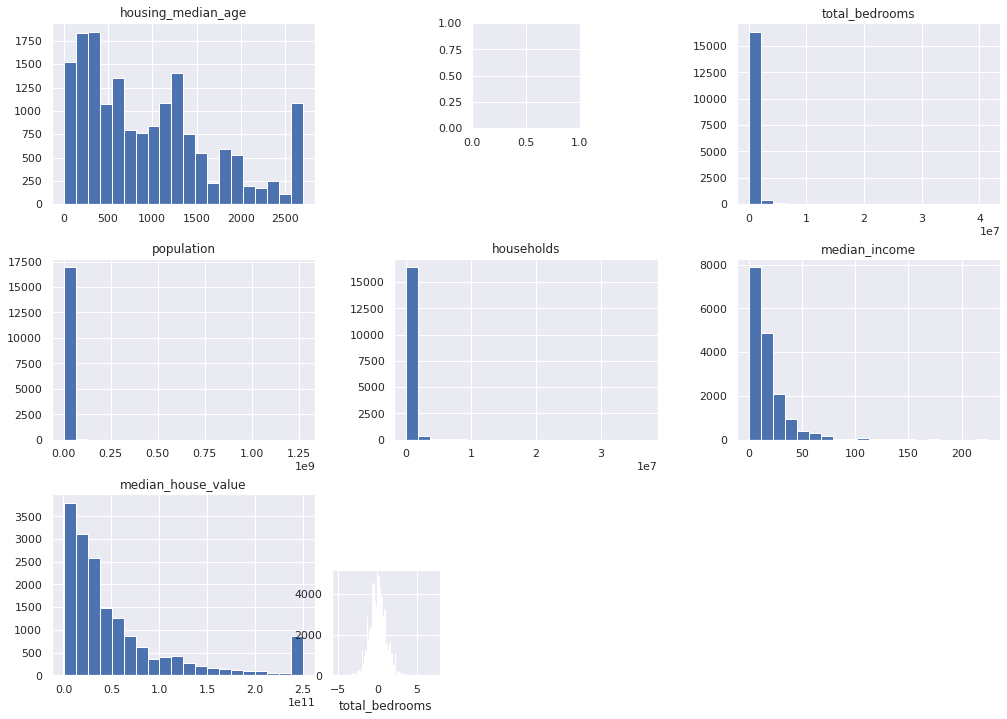

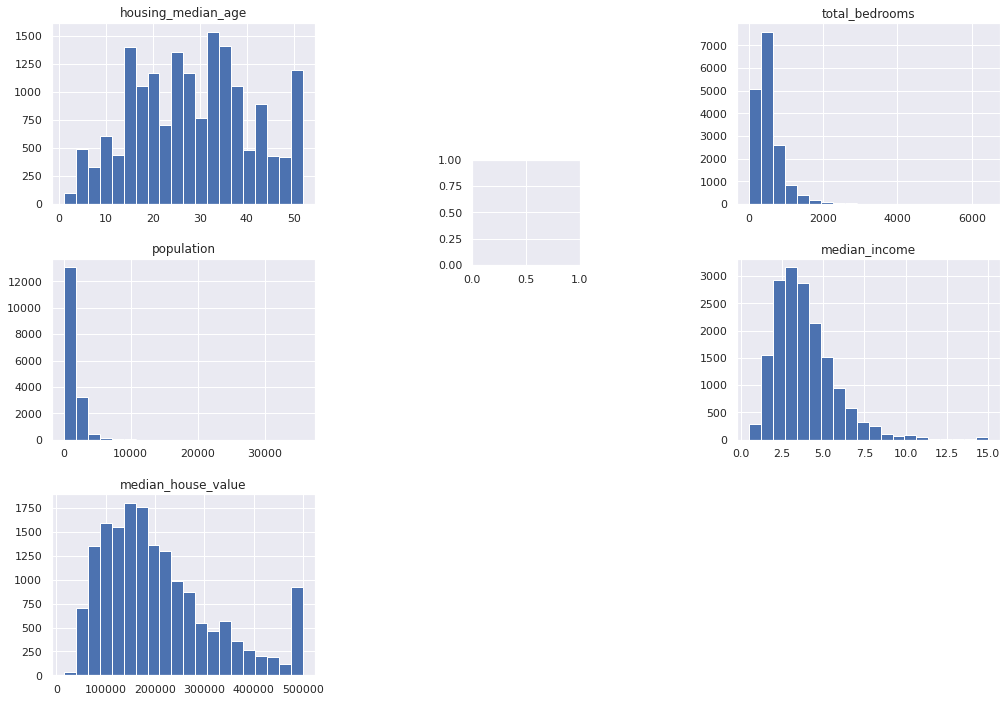

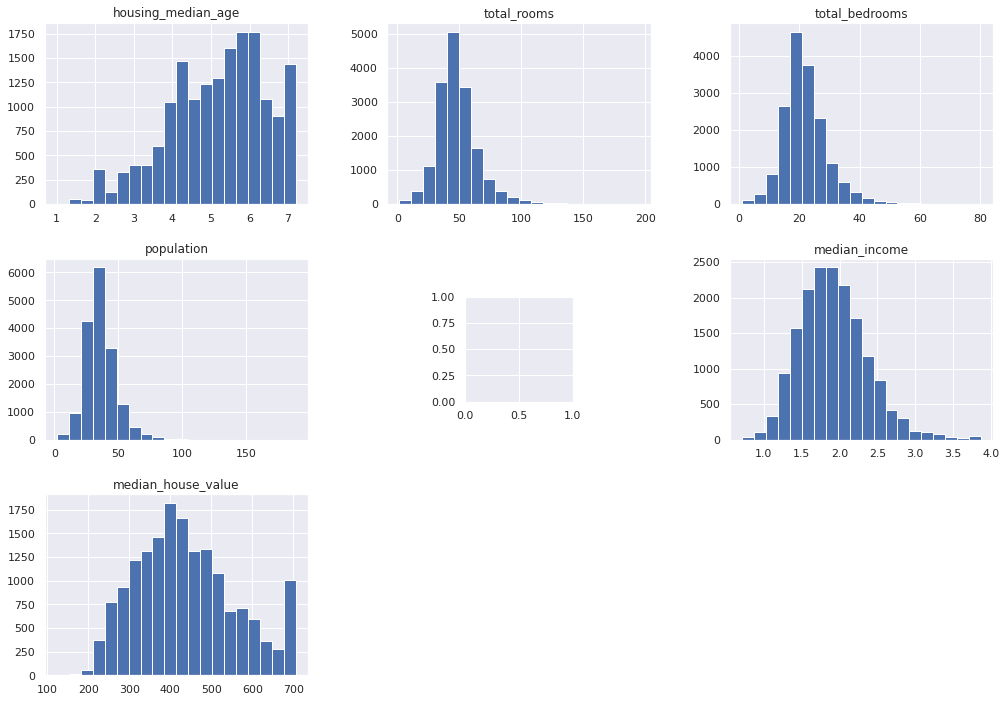

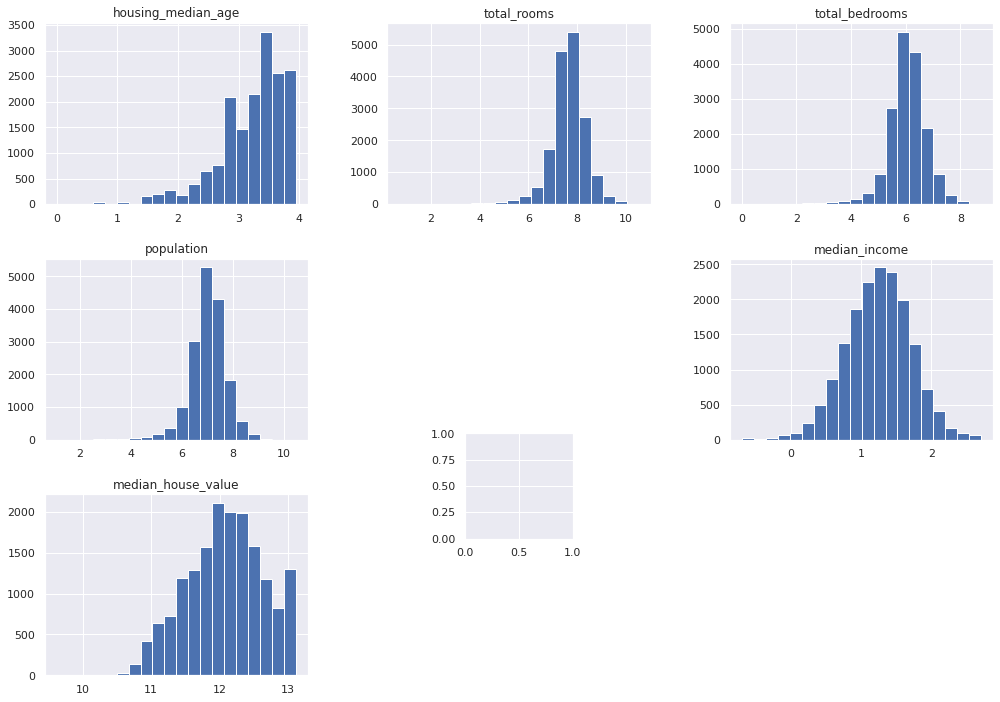

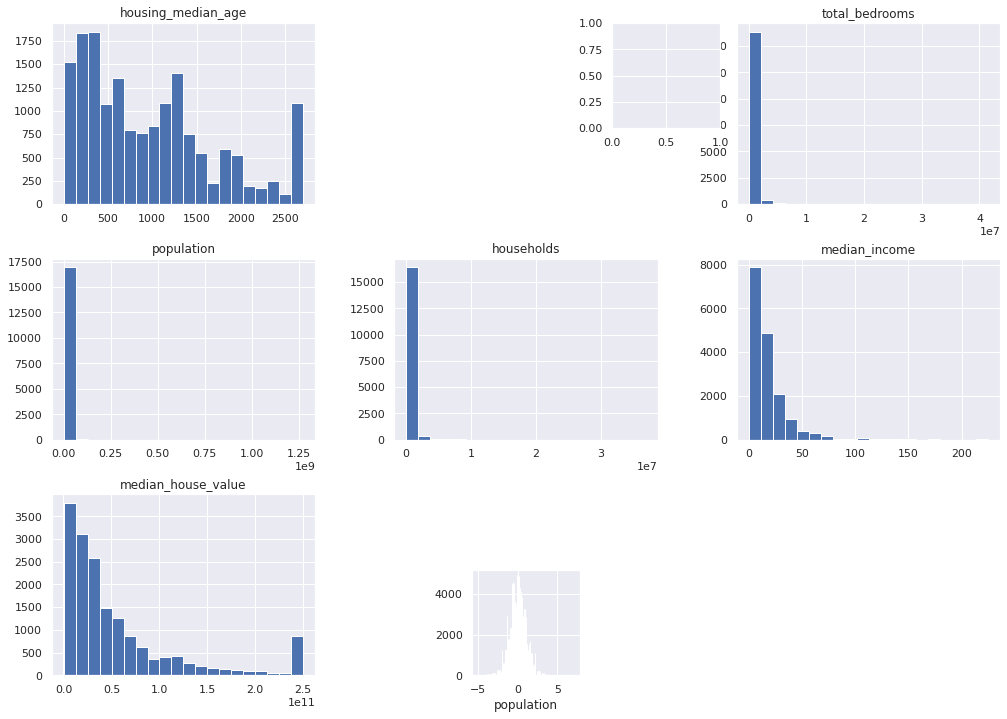

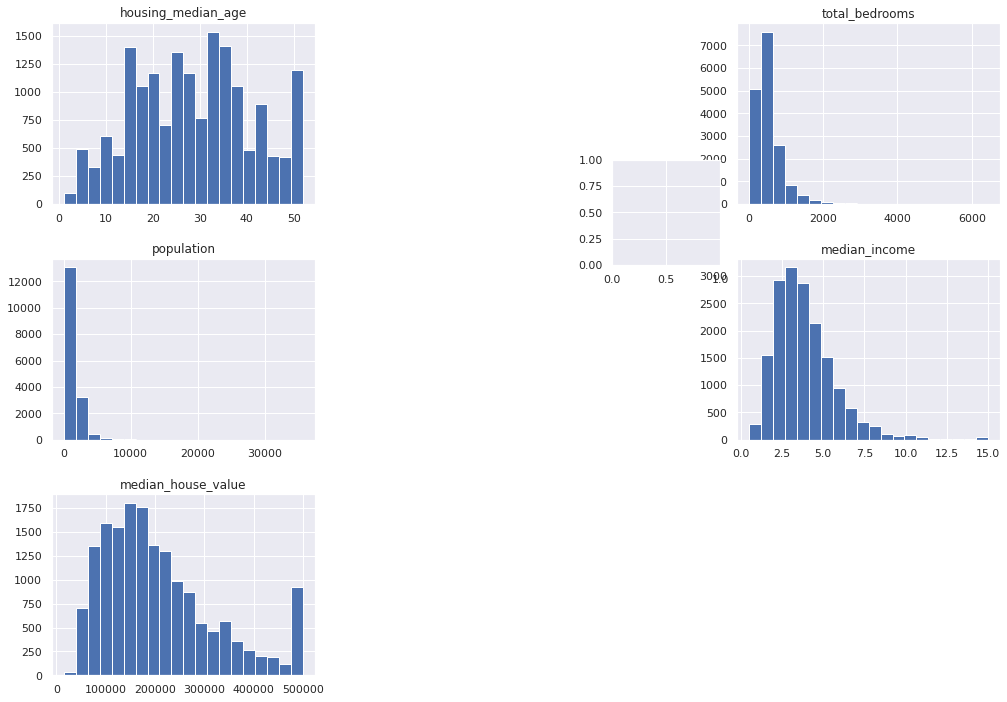

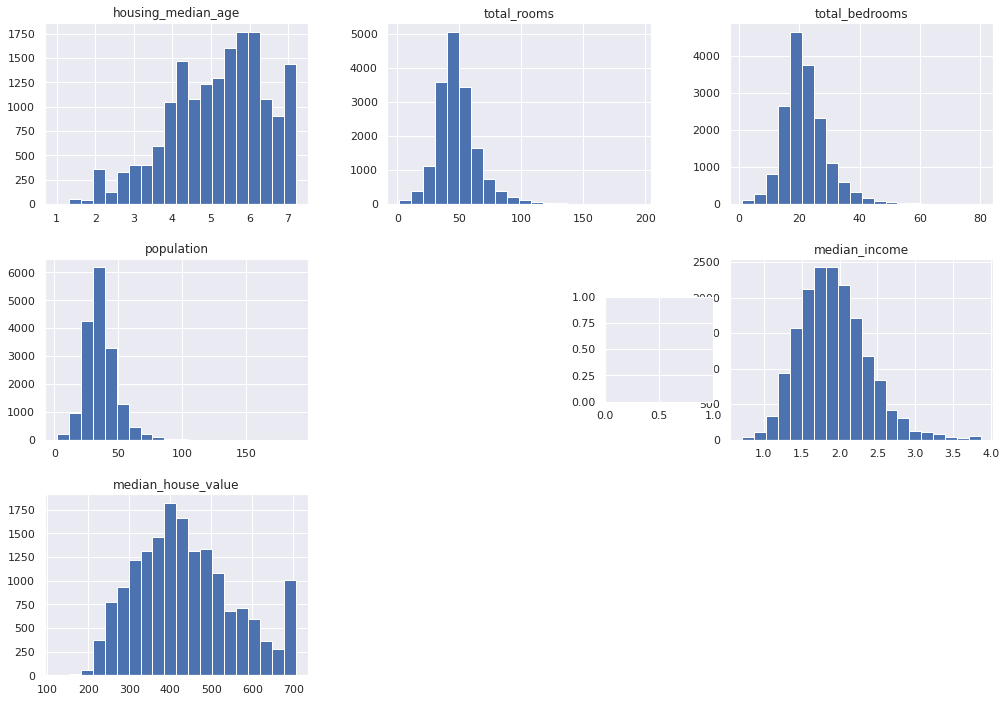

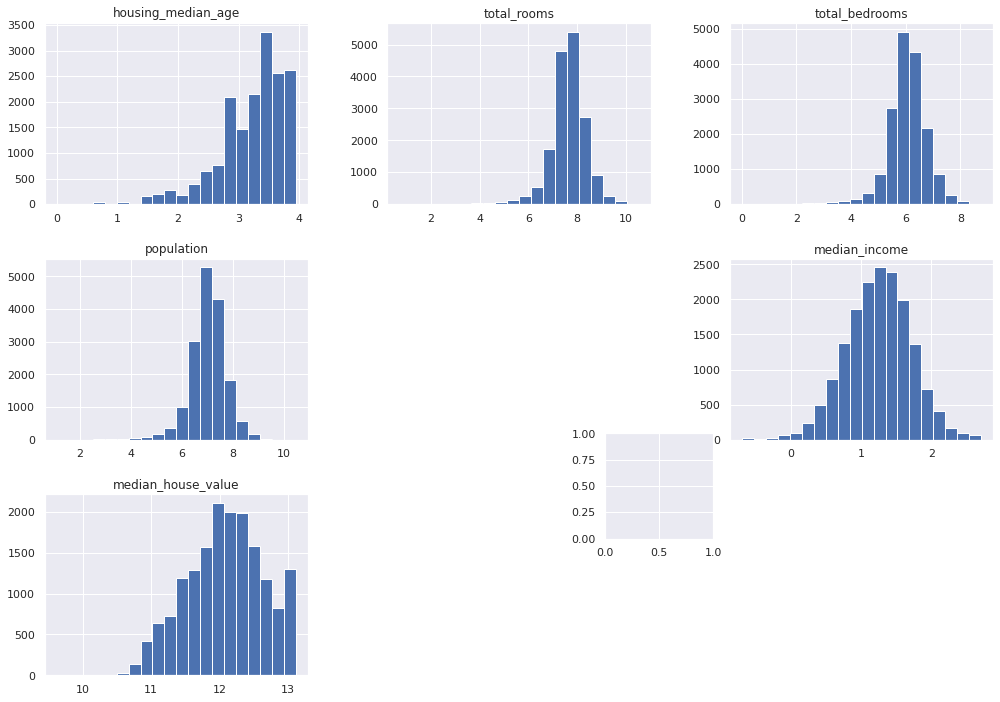

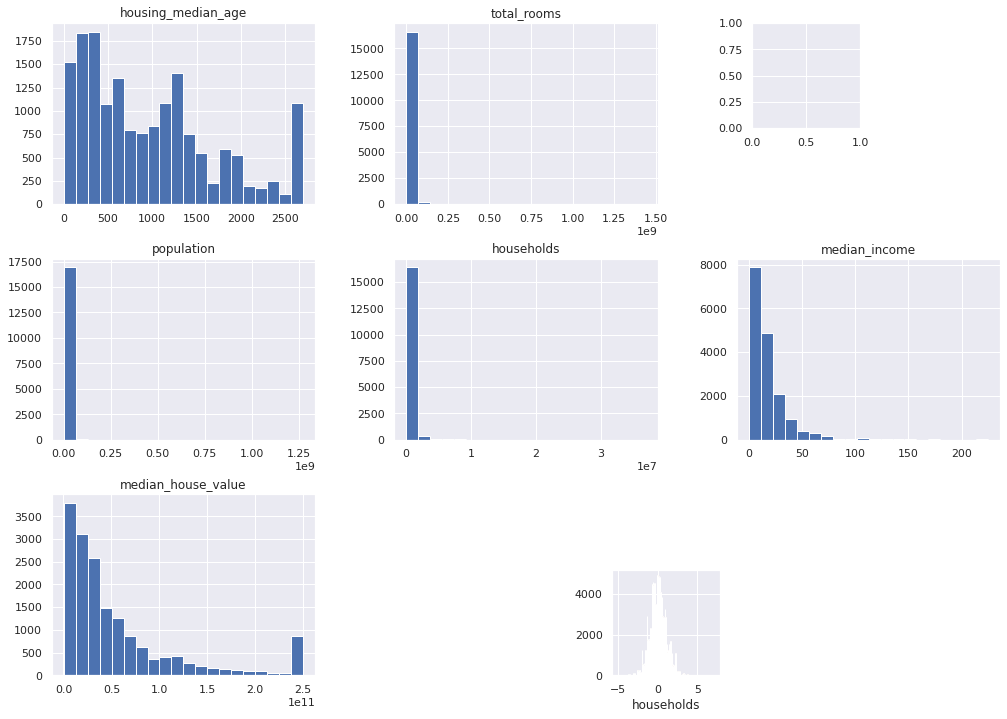

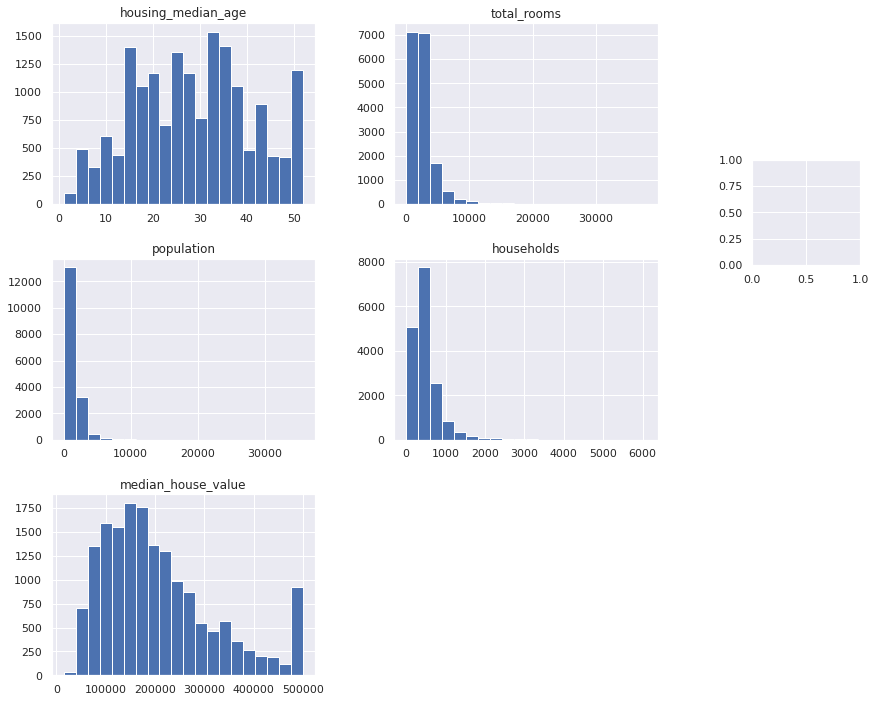

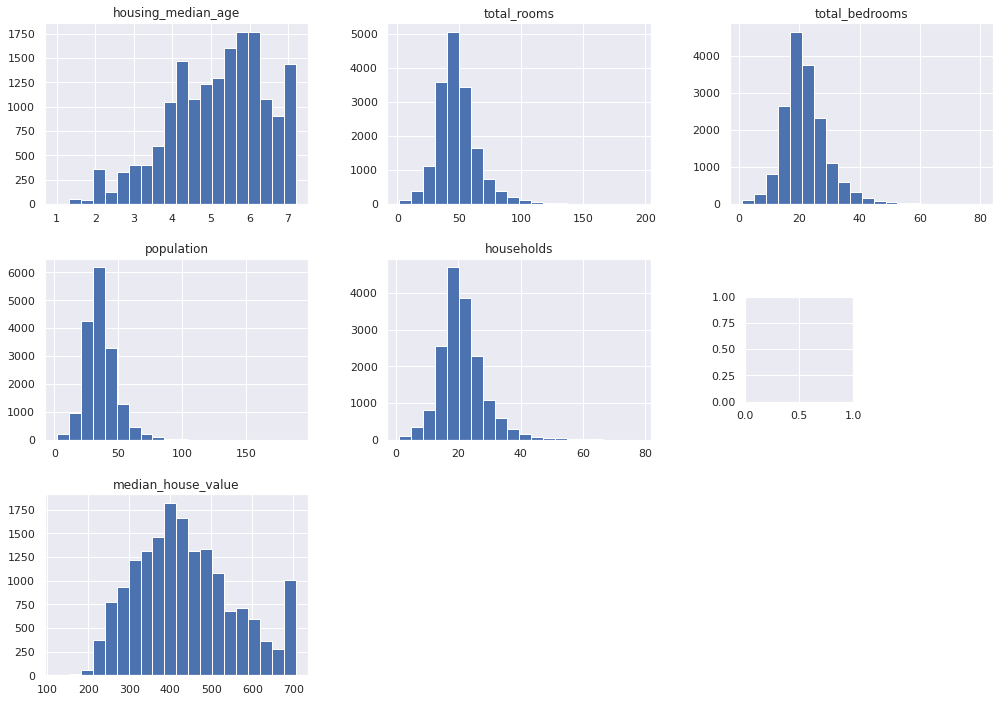

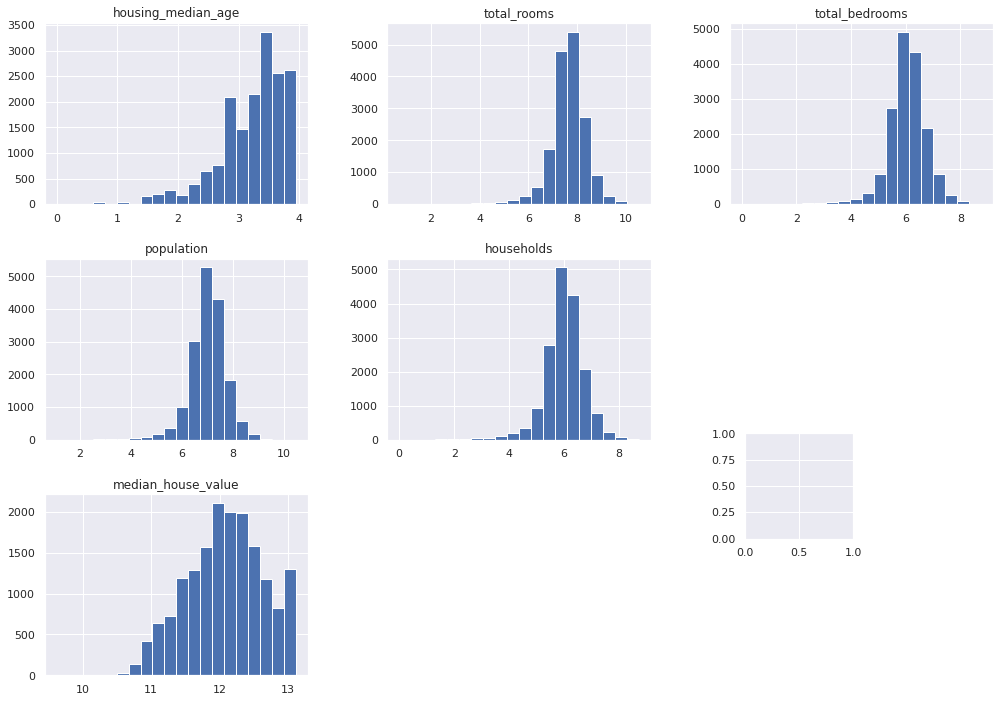

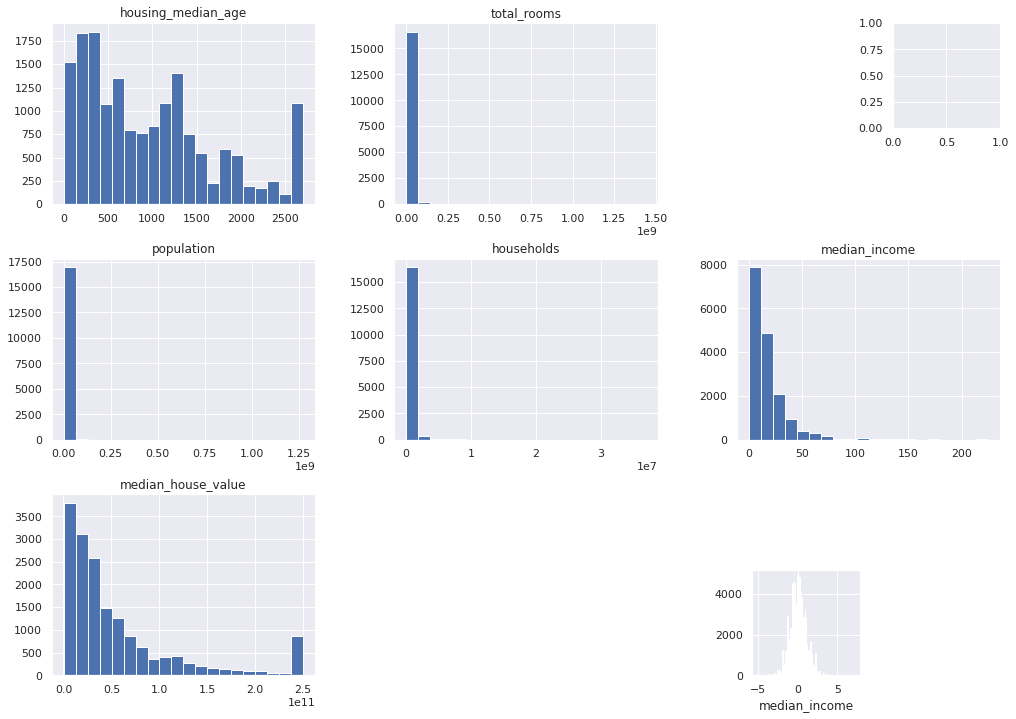

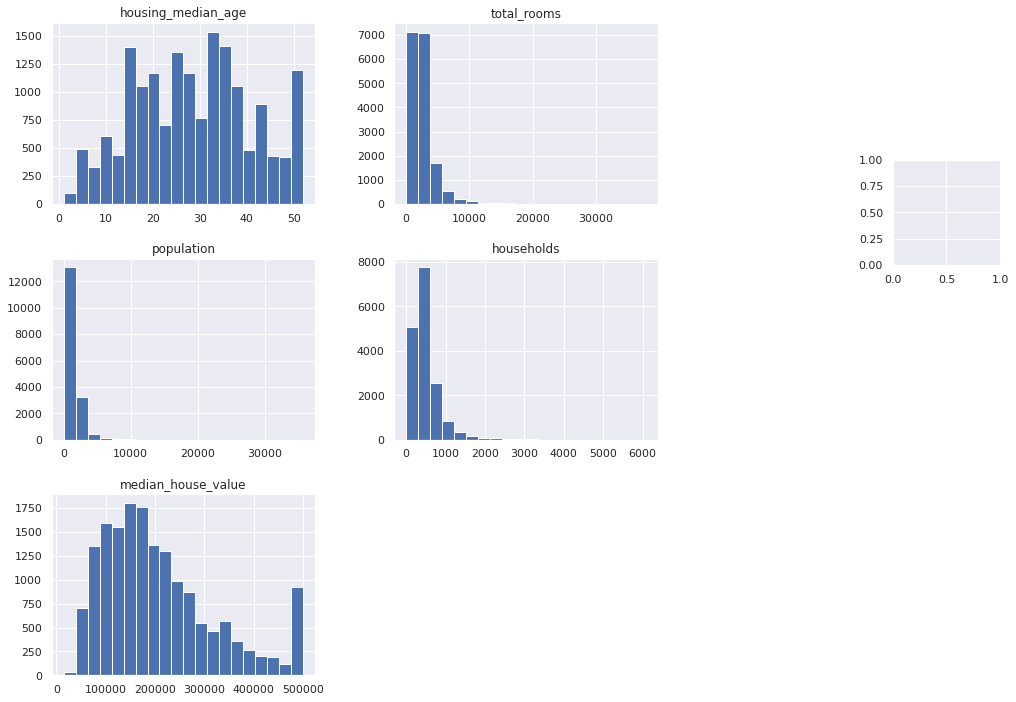

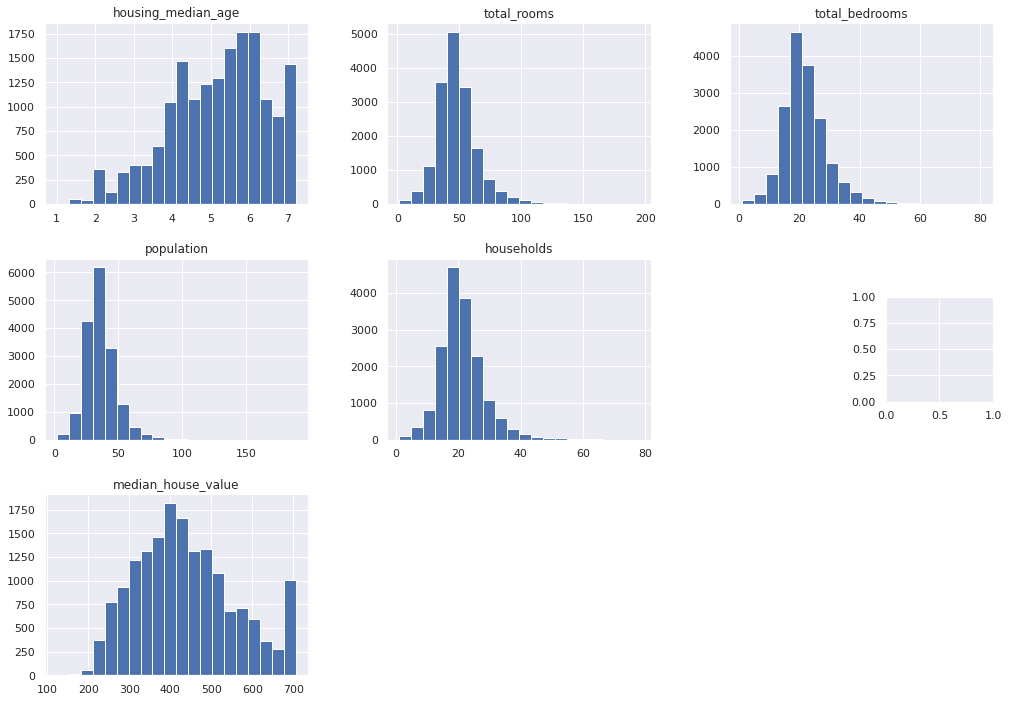

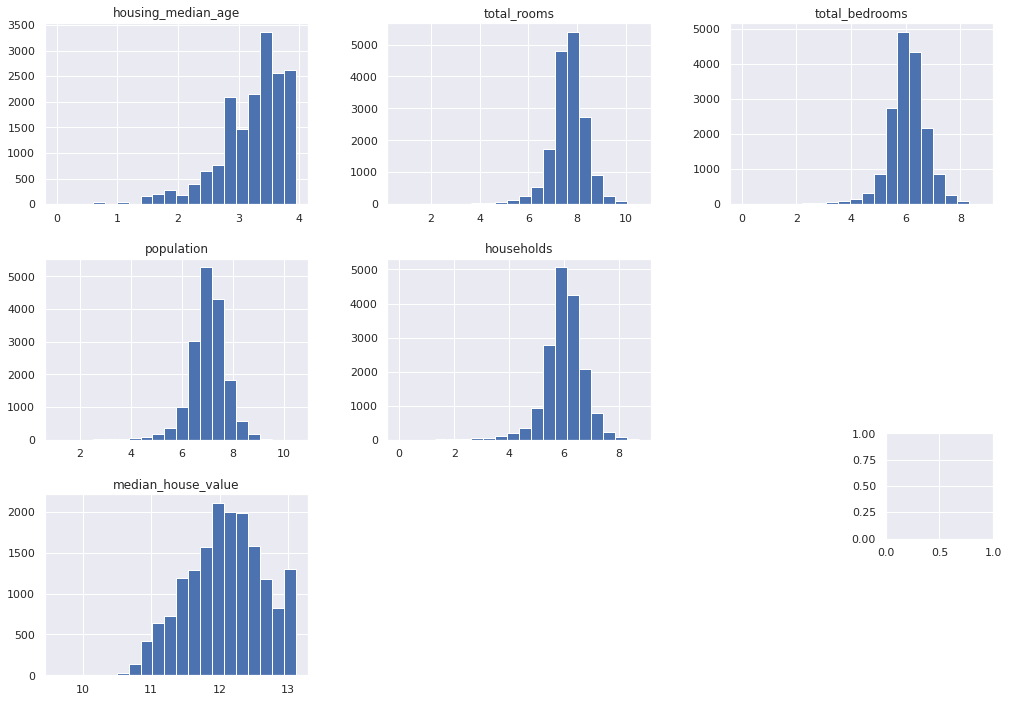

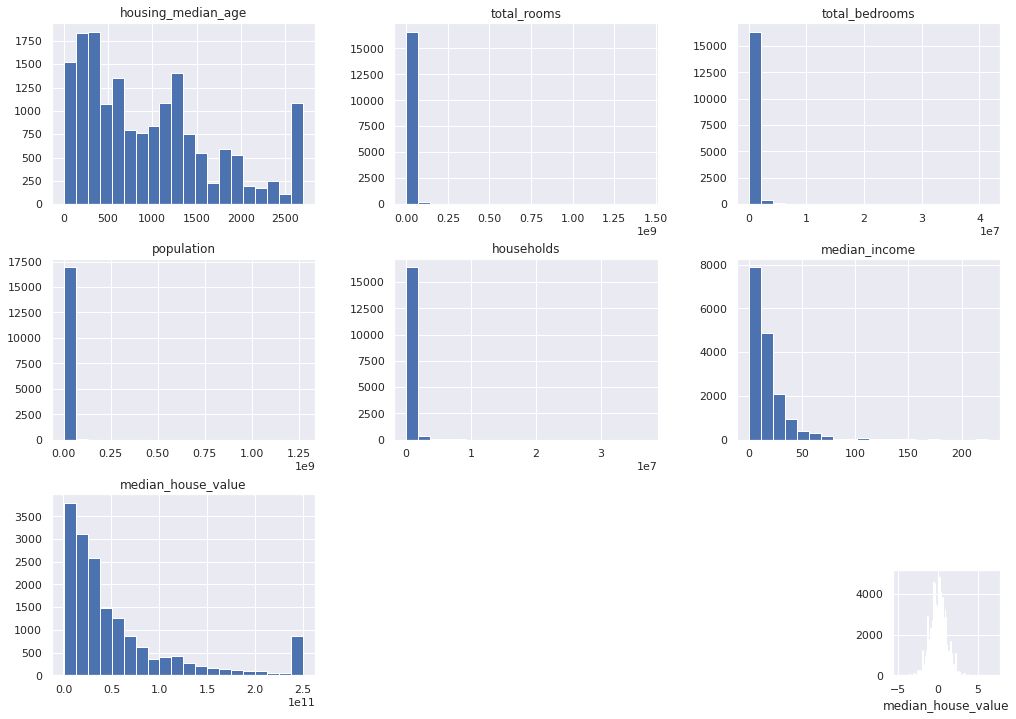

In [53]:

# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)    
  
for k in range(0,7):       
 
    ################################################################################################################
    # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
    # Ejercicio 2
    # Solamente deberás escribir tu código en las partes que dicen "None", sustituyendo este por tu código.
    # Deberás utilizar el dataframe "misdatos" con la lista que llamamos "variables_a_transformar" para 
    # seleccionar los valores de cada una de las 7 variables que se irán transformando y graficando.


    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = misdatos[variables_a_transformar]          #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    Transf0.hist(bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    


    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)    

    Transf1 = np.sqrt(misdatos[variables_a_transformar])          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    Transf1.hist(bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    

    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)     

    Transf2 = np.log(misdatos[variables_a_transformar])          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    Transf2.hist(bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    


    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.power(misdatos[variables_a_transformar],2)          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    Transf3.hist(bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(misdatos[variables_a_transformar],method='box-cox')          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4, bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################

    

plt.show()

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



INSTRUCCIONES:

En el archivo semana_02_IAyAA_RLM_teoria.pdf que se encuentra en Canvas se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE. 

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [ ]:
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 3

# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
#RMSE: Raíz del error cuadrático medio o Root Mean Squared Error
diferencia=np.subtract(observado,estimado)
square=np.square(diferencia)
MSE=square.mean()
mi_RMSE=np.sqrt(MSE)
print("Raíz del error cuadrático medio")

# Incluye aquí las líneas de código que definan a la función: mi_MAE:
diferencia=np.abs(observado-estimado)
mi_MAE=np.mean(diferencia)
print("Error absoluto medio") 

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
diferencia=np.abs((observado-estimado)/(observado))
mi_MAPE=np.mean(diferencia)
print("Error absoluto medio") 


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

In [ ]:
Xtrain = misdatos.drop('median_house_value', axis='columns')                                                                     
ytrain = misdatos['median_house_value']  

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),  
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])     

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')

modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)   

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)   
  XtrainTransf = XtrainFit.transform(X_train)    

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train) 

  XvalTransf = XtrainFit.transform(X_val) 
  yhatVal = modelo_LR.predict(XvalTransf)  

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

**\<\<Fin de la Actividad_1_Semana_2>>**